In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
def ExtractYear(x):  
  ans = x.split("+") 
  return ans[0]

In [ ]:
df["Date"] = df["Formatted Date"].apply(ExtractYear)
df.drop("Formatted Date",axis=1, inplace=True)

In [ ]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df[:26]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
Date,,,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000
2006-04-01 05:00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,2006-04-01 05:00:00.000
2006-04-01 06:00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,2006-04-01 06:00:00.000
2006-04-01 07:00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,2006-04-01 07:00:00.000
2006-04-01 08:00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,2006-04-01 08:00:00.000


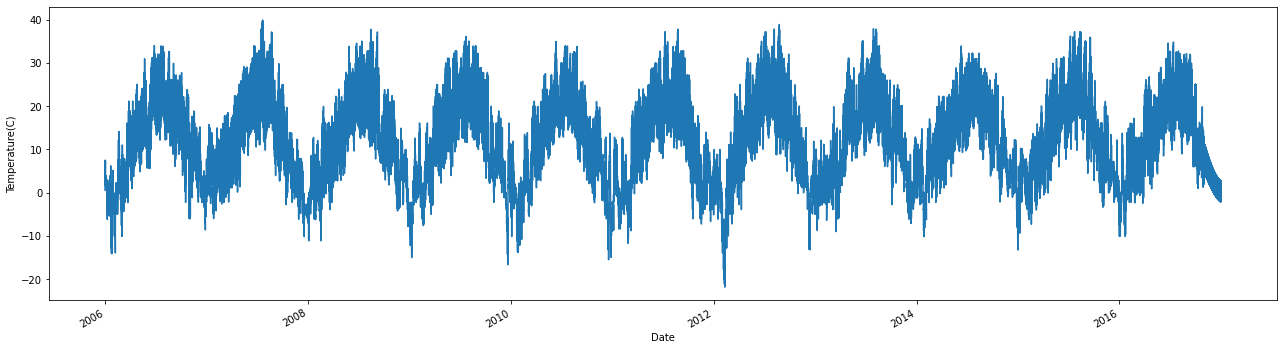

In [ ]:
temp = df['Temperature (C)']
plt.figure(figsize=(22,6))
plt.xlabel("Date")
plt.ylabel("Temperature(C)")
temp.plot()


In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((96448, 5, 1), (96448,))

In [ ]:
X_train1, y_train1 = X1[:75000], y1[:75000]
X_val1, y_val1 = X1[75000:85000], y1[75000:85000]
X_test1, y_test1 = X1[85000:], y1[85000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((75000, 5, 1), (75000,), (10000, 5, 1), (10000,), (11448, 5, 1), (11448,))

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('/tmp/model', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
2340/2344 [============================>.] - ETA: 0s - loss: 62.7779 - root_mean_squared_error: 7.9232

2344/2344 [==============================] - 15s 6ms/step - loss: 62.6881 - root_mean_squared_error: 7.9176 - val_loss: 5.5791 - val_root_mean_squared_error: 2.3620
Epoch 2/20
2334/2344 [============================>.] - ETA: 0s - loss: 3.5714 - root_mean_squared_error: 1.8898

2344/2344 [==============================] - 13s 6ms/step - loss: 3.5656 - root_mean_squared_error: 1.8883 - val_loss: 1.8248 - val_root_mean_squared_error: 1.3508
Epoch 3/20
2339/2344 [============================>.] - ETA: 0s - loss: 2.3379 - root_mean_squared_error: 1.5290

2344/2344 [==============================] - 13s 6ms/step - loss: 2.3374 - root_mean_squared_error: 1.5289 - val_loss: 1.5142 - val_root_mean_squared_error: 1.2305
Epoch 4/20
2332/2344 [============================>.] - ETA: 0s - loss: 2.1680 - root_mean_squared_error: 1.4724

2344/2344 [==============================] - 13s 6ms/step - loss: 2.1679 - root_mean_squared_error: 1.4724 - val_loss: 1.4657 - val_root_mean_squared_error: 1.2107
Epoch 5/20
2340/2344 [============================>.] - ETA: 0s - loss: 2.1176 - root_mean_squared_error: 1.4552

2344/2344 [==============================] - 13s 6ms/step - loss: 2.1162 - root_mean_squared_error: 1.4547 - val_loss: 1.4400 - val_root_mean_squared_error: 1.2000
Epoch 6/20
2333/2344 [============================>.] - ETA: 0s - loss: 2.0959 - root_mean_squared_error: 1.4477

2344/2344 [==============================] - 14s 6ms/step - loss: 2.0928 - root_mean_squared_error: 1.4466 - val_loss: 1.4017 - val_root_mean_squared_error: 1.1839
Epoch 7/20
2343/2344 [============================>.] - ETA: 0s - loss: 2.0782 - root_mean_squared_error: 1.4416

2344/2344 [==============================] - 13s 5ms/step - loss: 2.0783 - root_mean_squared_error: 1.4416 - val_loss: 1.3886 - val_root_mean_squared_error: 1.1784
Epoch 8/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0656 - root_mean_squared_error: 1.4372 - val_loss: 1.3896 - val_root_mean_squared_error: 1.1788
Epoch 9/20
2343/2344 [============================>.] - ETA: 0s - loss: 2.0584 - root_mean_squared_error: 1.4347

2344/2344 [==============================] - 13s 6ms/step - loss: 2.0585 - root_mean_squared_error: 1.4347 - val_loss: 1.3729 - val_root_mean_squared_error: 1.1717
Epoch 10/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0502 - root_mean_squared_error: 1.4318 - val_loss: 1.3732 - val_root_mean_squared_error: 1.1718
Epoch 11/20
2343/2344 [============================>.] - ETA: 0s - loss: 2.0433 - root_mean_squared_error: 1.4295

2344/2344 [==============================] - 14s 6ms/step - loss: 2.0430 - root_mean_squared_error: 1.4293 - val_loss: 1.3700 - val_root_mean_squared_error: 1.1705
Epoch 12/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0357 - root_mean_squared_error: 1.4268 - val_loss: 1.3703 - val_root_mean_squared_error: 1.1706
Epoch 13/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0307 - root_mean_squared_error: 1.4250 - val_loss: 1.3784 - val_root_mean_squared_error: 1.1741
Epoch 14/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0261 - root_mean_squared_error: 1.4234 - val_loss: 1.3721 - val_root_mean_squared_error: 1.1714
Epoch 15/20
2342/2344 [============================>.] - ETA: 0s - loss: 2.0187 - root_mean_squared_error: 1.4208

2344/2344 [==============================] - 13s 6ms/step - loss: 2.0207 - root_mean_squared_error: 1.4215 - val_loss: 1.3680 - val_root_mean_squared_error: 1.1696
Epoch 16/20
2331/2344 [============================>.] - ETA: 0s - loss: 2.0168 - root_mean_squared_error: 1.4201

2344/2344 [==============================] - 13s 6ms/step - loss: 2.0164 - root_mean_squared_error: 1.4200 - val_loss: 1.3458 - val_root_mean_squared_error: 1.1601
Epoch 17/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0132 - root_mean_squared_error: 1.4189 - val_loss: 1.3823 - val_root_mean_squared_error: 1.1757
Epoch 18/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0089 - root_mean_squared_error: 1.4174 - val_loss: 1.3476 - val_root_mean_squared_error: 1.1609
Epoch 19/20
2333/2344 [============================>.] - ETA: 0s - loss: 2.0045 - root_mean_squared_error: 1.4158

2344/2344 [==============================] - 13s 5ms/step - loss: 2.0048 - root_mean_squared_error: 1.4159 - val_loss: 1.3348 - val_root_mean_squared_error: 1.1553
Epoch 20/20
2344/2344 [==============================] - 9s 4ms/step - loss: 2.0024 - root_mean_squared_error: 1.4151 - val_loss: 1.3527 - val_root_mean_squared_error: 1.1631


In [ ]:
import keras
model1 = keras.models.load_model('/tmp/model')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

2344/2344 [==============================] - 5s 2ms/step


,Train Predictions,Actuals
0,8.542180,9.222222
1,9.412723,7.733333
2,7.476253,8.772222
3,8.567008,10.822222
4,11.887624,13.772222
...,...,...
74995,11.416194,11.044444
74996,10.846444,10.533333
74997,10.202121,10.533333
74998,10.354378,12.644444


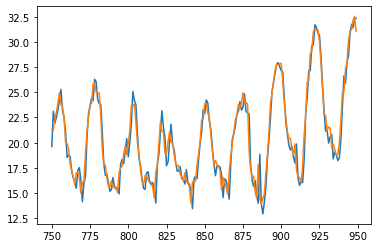

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][750:950])
plt.plot(train_results['Actuals'][750:950])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

313/313 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,18.615700,20.777778
1,23.266979,22.755556
2,24.119154,23.888889
3,24.816357,24.922222
4,25.469212,25.022222
...,...,...
9995,25.870892,26.250000
9996,24.205839,23.722222
9997,21.868677,19.950000
9998,18.858032,18.327778


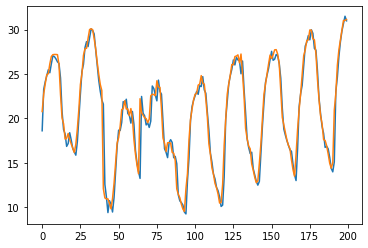

In [ ]:
plt.plot(val_results['Val Predictions'][:200])
plt.plot(val_results['Actuals'][:200])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

358/358 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,13.431273,14.400000
1,13.441884,14.566667
2,14.249949,14.466667
3,14.927525,13.844444
4,13.490830,12.922222
...,...,...
11443,26.965286,26.016667
11444,23.756338,24.583333
11445,22.755913,22.038889
11446,20.565475,21.522222


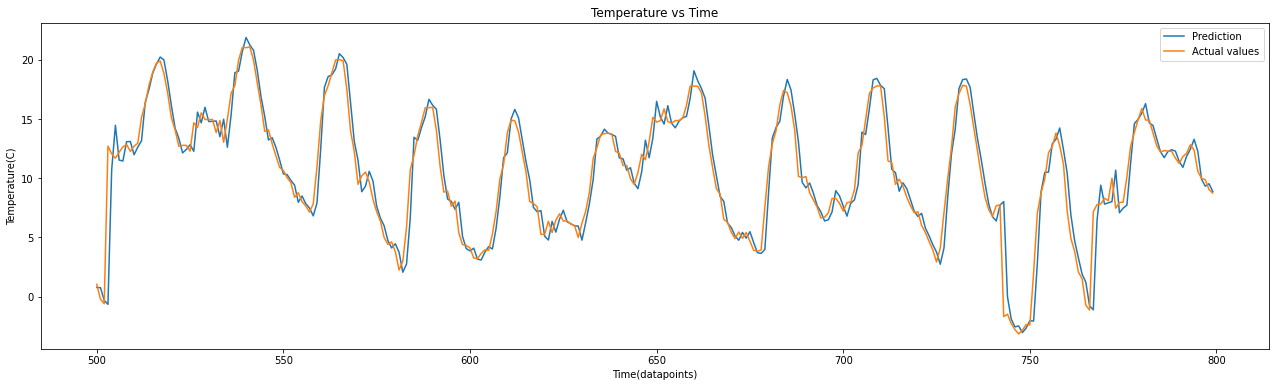

In [ ]:
plt.figure(figsize=(22,6))
plt.xlabel("Time(datapoints)")
plt.ylabel("Temperature(C)")
plt.title("Temperature vs Time")
plt.plot(test_results['Test Predictions'][500:800])
plt.plot(test_results['Actuals'][500:800])
plt.legend(["Prediction", "Actual values"])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  plt.xlabel("Predictions")
  plt.ylabel("Actual values")
  plt.title("Prediction vs Actual values")
  plt.legend(["Prediction", "Actual values"])
  return df, mse(y, predictions)

358/358 [==============================] - 1s 2ms/step


(       Predictions    Actuals
 0        13.431273  14.400000
 1        13.441884  14.566667
 2        14.249949  14.466667
 3        14.927525  13.844444
 4        13.490830  12.922222
 ...            ...        ...
 11443    26.965286  26.016667
 11444    23.756338  24.583333
 11445    22.755913  22.038889
 11446    20.565475  21.522222
 11447    20.160059  20.438889
 
 [11448 rows x 2 columns], 1.251537572702717)

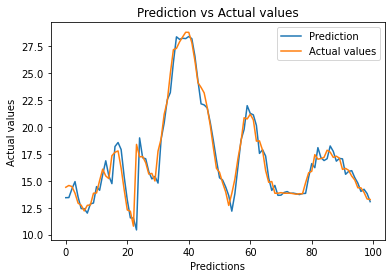

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

In [ ]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date,,
2006-04-01 00:00:00,9.472222,1.143850e+09
2006-04-01 01:00:00,9.355556,1.143853e+09
2006-04-01 02:00:00,9.377778,1.143857e+09
2006-04-01 03:00:00,8.288889,1.143860e+09
2006-04-01 04:00:00,8.755556,1.143864e+09
...,...,...
2016-09-09 19:00:00,26.016667,1.473448e+09
2016-09-09 20:00:00,24.583333,1.473451e+09
2016-09-09 21:00:00,22.038889,1.473455e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date,,,,,,
2006-04-01 00:00:00,9.472222,1.143850e+09,-4.187642e-12,1.000000,0.999840,0.017901
2006-04-01 01:00:00,9.355556,1.143853e+09,2.588190e-01,0.965926,0.999852,0.017184
2006-04-01 02:00:00,9.377778,1.143857e+09,5.000000e-01,0.866025,0.999864,0.016467
2006-04-01 03:00:00,8.288889,1.143860e+09,7.071068e-01,0.707107,0.999876,0.015751
2006-04-01 04:00:00,8.755556,1.143864e+09,8.660254e-01,0.500000,0.999887,0.015034


In [ ]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date,,,,,
2006-04-01 00:00:00,9.472222,-4.187642e-12,1.000000,0.999840,0.017901
2006-04-01 01:00:00,9.355556,2.588190e-01,0.965926,0.999852,0.017184
2006-04-01 02:00:00,9.377778,5.000000e-01,0.866025,0.999864,0.016467
2006-04-01 03:00:00,8.288889,7.071068e-01,0.707107,0.999876,0.015751
2006-04-01 04:00:00,8.755556,8.660254e-01,0.500000,0.999887,0.015034


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((96447, 6, 5), (96447,))

In [ ]:
X2_train, y2_train = X2[:75000], y2[:75000]
X2_val, y2_val = X2[75000:85000], y2[75000:85000]
X2_test, y2_test = X2[85000:], y2[85000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((75000, 6, 5), (75000,), (10000, 6, 5), (10000,), (11447, 6, 5), (11447,))

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
2341/2344 [============================>.] - ETA: 0s - loss: 47.3873 - root_mean_squared_error: 6.8838

2344/2344 [==============================] - 16s 6ms/step - loss: 47.3415 - root_mean_squared_error: 6.8805 - val_loss: 6.3952 - val_root_mean_squared_error: 2.5289
Epoch 2/10
2341/2344 [============================>.] - ETA: 0s - loss: 4.8739 - root_mean_squared_error: 2.2077

2344/2344 [==============================] - 15s 6ms/step - loss: 4.8708 - root_mean_squared_error: 2.2070 - val_loss: 2.5078 - val_root_mean_squared_error: 1.5836
Epoch 3/10
2342/2344 [============================>.] - ETA: 0s - loss: 2.5409 - root_mean_squared_error: 1.5940

2344/2344 [==============================] - 15s 6ms/step - loss: 2.5405 - root_mean_squared_error: 1.5939 - val_loss: 1.6189 - val_root_mean_squared_error: 1.2724
Epoch 4/10
2343/2344 [============================>.] - ETA: 0s - loss: 2.0483 - root_mean_squared_error: 1.4312

2344/2344 [==============================] - 14s 6ms/step - loss: 2.0479 - root_mean_squared_error: 1.4310 - val_loss: 1.3401 - val_root_mean_squared_error: 1.1576
Epoch 5/10
2334/2344 [============================>.] - ETA: 0s - loss: 1.8207 - root_mean_squared_error: 1.3493

2344/2344 [==============================] - 15s 6ms/step - loss: 1.8224 - root_mean_squared_error: 1.3500 - val_loss: 1.2248 - val_root_mean_squared_error: 1.1067
Epoch 6/10
2343/2344 [============================>.] - ETA: 0s - loss: 1.7119 - root_mean_squared_error: 1.3084

2344/2344 [==============================] - 15s 6ms/step - loss: 1.7119 - root_mean_squared_error: 1.3084 - val_loss: 1.1272 - val_root_mean_squared_error: 1.0617
Epoch 7/10
2338/2344 [============================>.] - ETA: 0s - loss: 1.6652 - root_mean_squared_error: 1.2904

2344/2344 [==============================] - 15s 6ms/step - loss: 1.6646 - root_mean_squared_error: 1.2902 - val_loss: 1.0810 - val_root_mean_squared_error: 1.0397
Epoch 8/10
2337/2344 [============================>.] - ETA: 0s - loss: 1.6344 - root_mean_squared_error: 1.2784

2344/2344 [==============================] - 15s 6ms/step - loss: 1.6326 - root_mean_squared_error: 1.2777 - val_loss: 1.0800 - val_root_mean_squared_error: 1.0392
Epoch 9/10
2338/2344 [============================>.] - ETA: 0s - loss: 1.6231 - root_mean_squared_error: 1.2740

2344/2344 [==============================] - 15s 6ms/step - loss: 1.6210 - root_mean_squared_error: 1.2732 - val_loss: 1.0450 - val_root_mean_squared_error: 1.0223
Epoch 10/10
2332/2344 [============================>.] - ETA: 0s - loss: 1.6056 - root_mean_squared_error: 1.2671

2344/2344 [==============================] - 14s 6ms/step - loss: 1.6032 - root_mean_squared_error: 1.2662 - val_loss: 1.0438 - val_root_mean_squared_error: 1.0217


358/358 [==============================] - 2s 3ms/step


(       Predictions    Actuals
 0        13.512703  14.566667
 1        13.718115  14.466667
 2        13.774035  13.844444
 3        13.628325  12.922222
 4        13.303665  12.733333
 ...            ...        ...
 11442    25.960705  26.016667
 11443    23.266672  24.583333
 11444    22.253429  22.038889
 11445    20.507057  21.522222
 11446    20.144968  20.438889
 
 [11447 rows x 2 columns], 1.0267760866188675)

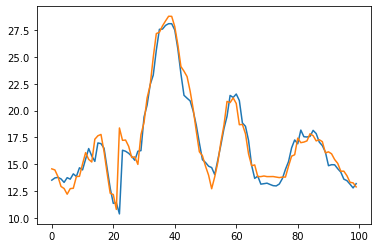

In [ ]:
plot_predictions1(model4, X2_test, y2_test)